<a href="https://colab.research.google.com/github/ArseniyKoz/uni.neuralnetworks/blob/main/nn_mnist_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 128

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

# prepare data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
print(train_data)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 16477877.31it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 490608.66it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4493978.52it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2503683.63it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


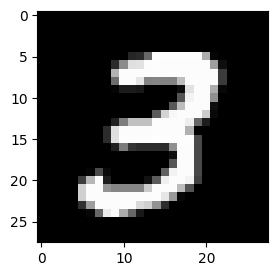

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

img = np.squeeze(images[7])

flg = plt.figure(figsize = (3, 3))
ax = flg.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Discriminator(nn.Module):
  def __init__(self, input_size, hidden_dim, dropout, output_size):
    super(Discriminator, self).__init__()
    # TO DO: define all layers
    # define hidden linear layers (2-3)
    self.hidden1 = nn.Linear(input_size, 8*hidden_dim)
    self.hidden2 = nn.Linear(8*hidden_dim, 4*hidden_dim)
    self.hidden3 = nn.Linear(4*hidden_dim, 2*hidden_dim)
    self.hidden4 = nn.Linear(2*hidden_dim, hidden_dim)

    # final fully-connected layer
    self.fc = nn.Linear(hidden_dim, output_size)

    # dropout layer
    self.dropout = nn.Dropout(dropout)

    self.lRelu = nn.LeakyReLU(0.2)

    self.sigm = nn.Sigmoid()


  def forward(self, x):
    #TO DO: make forward
    # flatten image
    out = x.view(-1, 28*28)
    #out = self.flatten(x)

    # pass x through all layers
    # apply leaky relu activation to all hidden layers
    out = self.hidden1(out)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.hidden2(out)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.hidden3(out)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.hidden4(out)
    out = self.lRelu(out)
    out = self.dropout(out)
    # dropout

    # final output
    out = self.fc(out)
    #out = self.sigm(out)

    return out

In [ ]:
import torch.nn.functional as F
class Generator(nn.Module):
  def __init__(self, input_size, hidden_dim, dropout, output_size):
    super(Generator, self).__init__()
    # TODO: define all layers
    # define hidden linear layers (2-3)
    self.hidden1 = nn.Linear(input_size, hidden_dim)
    self.hidden2 = nn.Linear(hidden_dim, 2*hidden_dim)
    self.hidden3 = nn.Linear(2*hidden_dim, 4*hidden_dim)
    self.hidden4 = nn.Linear(4*hidden_dim, 8*hidden_dim)

    # final fully-connected layer
    self.fc = nn.Linear(8*hidden_dim, output_size)

    # dropout layer
    self.dropout = nn.Dropout(dropout)

    self.lRelu = nn.LeakyReLU(0.2)
    self.tan = nn.Tanh()

  def forward(self, x):
    # pass x through all layers
    out = self.hidden1(x)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.hidden2(out)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.hidden3(out)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.hidden4(out)
    out = self.lRelu(out)
    out = self.dropout(out)

    out = self.fc(out)
    out = self.tan(out)

    return out

In [ ]:
# Discriminator hyperparams
k = 28
# Size of input image to discriminator (28*28)
input_size = k*k

# Size of discriminator output (real or fake)
d_output_size = 1

# Size of *last* hidden layer in the discriminator
d_hidden_size = 64

# Generator hyperparams
# Size of latent vector to give to generator
z_size = 100

# Size of discriminator output (generated image)
g_output_size = k*k

# Size of *first* hidden layer in the generator
g_hidden_size = 64

dropout = 0.3
lr = 0.0005

In [ ]:
D = Discriminator(input_size, d_hidden_size, dropout, d_output_size)
G = Generator(z_size, g_hidden_size, dropout, g_output_size)
print(D)
print()
G

Discriminator(
  (hidden1): Linear(in_features=784, out_features=512, bias=True)
  (hidden2): Linear(in_features=512, out_features=256, bias=True)
  (hidden3): Linear(in_features=256, out_features=128, bias=True)
  (hidden4): Linear(in_features=128, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (lRelu): LeakyReLU(negative_slope=0.2)
  (sigm): Sigmoid()
)



Generator(
  (hidden1): Linear(in_features=100, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=256, bias=True)
  (hidden4): Linear(in_features=256, out_features=512, bias=True)
  (fc): Linear(in_features=512, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (lRelu): LeakyReLU(negative_slope=0.2)
  (tan): Tanh()
)

In [ ]:
# Calculate losses
def real_loss(D_out, smooth=False):
    # compare logits to real labels
    # smooth labels if smooth=True
    batch_size = D_out.size(0)
    if smooth:
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size)
    criterion = nn.BCEWithLogitsLoss()


    loss = criterion(D_out.squeeze(),labels)
    return loss

def fake_loss(D_out):
    # compare logits to fake labels
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(),labels)
    return loss

In [ ]:
import torch.optim as optim
# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(),lr)
g_optimizer = optim.Adam(G.parameters(),lr)

In [ ]:
import pickle as pkl

# training hyperparams
num_epochs = 200

# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 400

# Get some fixed data for sampling. These are images that are held
# constant throughout training, and allow us to inspect the model's performance
sample_size=16
fixed_z = np.random.uniform(-1,1,size = (batch_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()

# train the network
D.train()
G.train()
for epoch in range(num_epochs):

    for batch_i, (real_images, _) in enumerate(train_loader):

        batch_size = real_images.size(0)

        ## Important rescaling step ##
        real_images = real_images*2 - 1  # rescale input images from [0,1) to [-1, 1)

        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================

        # 1. Train with real images
        d_optimizer.zero_grad()

        # Compute the discriminator losses on real images
        # use smoothed labels
        op_real = D(real_images)
        d_real_loss = real_loss(op_real,smooth = True)


        # 2. Train with fake images

        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)

        # Compute the discriminator losses on fake images
        op_fake = D(fake_images)
        #print(type(fake_loss))
        d_fake_loss = fake_loss(op_fake)

        # add up real and fake losses and perform backprop
        d_loss = d_fake_loss + d_real_loss
        d_loss.backward()
        d_optimizer.step()

        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================

        # 1. Train with fake images and flipped labels
        g_optimizer.zero_grad()

        # Generate fake images
        z = np.random.uniform(-1,1,size = (batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)

        # Compute the discriminator losses on fake images
        # using flipped labels!
        d_fake_loss = D(fake_images)
        g_loss = real_loss(d_fake_loss)
        # perform backprop
        g_loss.backward()
        g_optimizer.step()


        # Print some loss stats
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))


    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))

    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

Epoch [    1/  200] | d_loss: 1.3965 | g_loss: 0.6499
Epoch [    1/  200] | d_loss: 0.7801 | g_loss: 5.4298
Epoch [    2/  200] | d_loss: 0.7211 | g_loss: 3.9959
Epoch [    2/  200] | d_loss: 1.2193 | g_loss: 1.1926
Epoch [    3/  200] | d_loss: 0.7386 | g_loss: 3.7825
Epoch [    3/  200] | d_loss: 1.3813 | g_loss: 0.6387
Epoch [    4/  200] | d_loss: 1.3624 | g_loss: 0.6914
Epoch [    4/  200] | d_loss: 1.2790 | g_loss: 0.9914
Epoch [    5/  200] | d_loss: 1.5182 | g_loss: 0.5902
Epoch [    5/  200] | d_loss: 1.2381 | g_loss: 0.9176
Epoch [    6/  200] | d_loss: 1.4632 | g_loss: 0.9585
Epoch [    6/  200] | d_loss: 0.8651 | g_loss: 2.6227
Epoch [    7/  200] | d_loss: 0.9536 | g_loss: 3.4520
Epoch [    7/  200] | d_loss: 0.8329 | g_loss: 3.2210
Epoch [    8/  200] | d_loss: 0.8355 | g_loss: 3.5184
Epoch [    8/  200] | d_loss: 0.8798 | g_loss: 3.1180
Epoch [    9/  200] | d_loss: 0.6027 | g_loss: 2.5558
Epoch [    9/  200] | d_loss: 0.7294 | g_loss: 3.6135
Epoch [   10/  200] | d_loss

In [ ]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

In [ ]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=10, ncols=10, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

In [ ]:
with open('train_samples.pkl', 'rb') as f:
  samples = pkl.load(f)

In [ ]:
view_samples(-1, samples)

In [ ]:
rows = 25 # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        img = img.detach()
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

In [ ]:
# randomly generated, new latent vectors
sample_size=100
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float()

G.eval() # eval mode
# generated samples
rand_images = G(rand_z)

# 0 indicates the first set of samples in the passed in list
# and we only have one batch of samples, here
view_samples(0, [rand_images])